In [3]:
import numpy as np
import pandas as pd
# Read the CSV file into a DataFrame
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
print(df.dtypes)


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [6]:
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [7]:
print(df.isnull().sum())


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df['Sex'].replace(to_replace=['M','F'],value=[1,2],inplace=True)
df['ChestPainType'].replace(to_replace=['ATA','NAP','ASY','TA'],value=[1,2,3,4],inplace=True)
df['RestingECG'].replace(to_replace=['Normal','ST','LVH'],value=[1,2,3],inplace=True)
df['ExerciseAngina'].replace(to_replace=['N','Y'],value=[1,2],inplace=True)
df['ST_Slope'].replace(to_replace=['Up','Flat','Down'],value=[1,2,3],inplace=True)

In [10]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,1,0.0,1,0
1,49,2,2,160,180,0,1,156,1,1.0,2,1
2,37,1,1,130,283,0,2,98,1,0.0,1,0
3,48,2,3,138,214,0,1,108,2,1.5,2,1
4,54,1,2,150,195,0,1,122,1,0.0,1,0


In [11]:
df.describe()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,1.210240,2.452070,132.396514,198.799564,0.233115,1.603486,136.809368,1.404139,0.887364,1.638344,0.553377
std,9.432617,0.407701,0.851832,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,60.000000,1.000000,-2.600000,1.000000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,173.250000,0.000000,1.000000,120.000000,1.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,223.000000,0.000000,1.000000,138.000000,1.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,267.000000,0.000000,2.000000,156.000000,2.000000,1.500000,2.000000,1.000000
max,77.000000,2.000000,4.000000,200.000000,603.000000,1.000000,3.000000,202.000000,2.000000,6.200000,3.000000,1.000000


In [12]:
from sklearn.preprocessing import MinMaxScaler
# Separate the features from the target variable
X = df.drop('HeartDisease', axis=1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the features
X_normalized = scaler.fit_transform(X)

# Create a new DataFrame with the normalized features
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)
# Print the first few rows of the normalized dataset
print(df_normalized.head())

# Display the entire normalized dataset
display(df_normalized)


        Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  0.244898  0.0       0.000000       0.70     0.479270        0.0   
1  0.428571  1.0       0.333333       0.80     0.298507        0.0   
2  0.183673  0.0       0.000000       0.65     0.469320        0.0   
3  0.408163  1.0       0.666667       0.69     0.354892        0.0   
4  0.530612  0.0       0.333333       0.75     0.323383        0.0   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  
0         0.0  0.788732             0.0  0.295455       0.0  
1         0.0  0.676056             0.0  0.409091       0.5  
2         0.5  0.267606             0.0  0.295455       0.0  
3         0.0  0.338028             1.0  0.465909       0.5  
4         0.0  0.436620             0.0  0.295455       0.0  


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,0.0,0.000000,0.70,0.479270,0.0,0.0,0.788732,0.0,0.295455,0.0
1,0.428571,1.0,0.333333,0.80,0.298507,0.0,0.0,0.676056,0.0,0.409091,0.5
2,0.183673,0.0,0.000000,0.65,0.469320,0.0,0.5,0.267606,0.0,0.295455,0.0
3,0.408163,1.0,0.666667,0.69,0.354892,0.0,0.0,0.338028,1.0,0.465909,0.5
4,0.530612,0.0,0.333333,0.75,0.323383,0.0,0.0,0.436620,0.0,0.295455,0.0
...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.0,1.000000,0.55,0.437811,0.0,0.0,0.507042,0.0,0.431818,0.5
914,0.816327,0.0,0.666667,0.72,0.320066,1.0,0.0,0.570423,0.0,0.681818,0.5
915,0.591837,0.0,0.666667,0.65,0.217247,0.0,0.0,0.387324,1.0,0.431818,0.5
916,0.591837,1.0,0.000000,0.65,0.391376,0.0,1.0,0.802817,0.0,0.295455,0.5


In [13]:
from sklearn.decomposition import PCA
#feature extraction 
# Separate the features from the target variable
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Apply PCA for feature extraction
pca = PCA(n_components=3)  # Specify the number of components you want to extract
X_extracted = pca.fit_transform(X)

# Create a new DataFrame with the extracted features
df_extracted = pd.DataFrame(X_extracted, columns=['PC1', 'PC2', 'PC3'])

# Concatenate the extracted features with the target variable
df_final = pd.concat([df_extracted, y], axis=1)

# Print the first few rows of the extracted features with the target variable
print(df_final.head())

         PC1        PC2        PC3  HeartDisease
0  92.311833 -29.451929 -12.020900             0
1 -17.143494 -13.741907 -31.479477             1
2  81.908358  38.213321  16.068627             0
3  13.653645  28.746346   2.733778             1
4  -4.348431  18.095159 -13.439214             0


c:\users\saman\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\saman\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\saman\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\saman\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

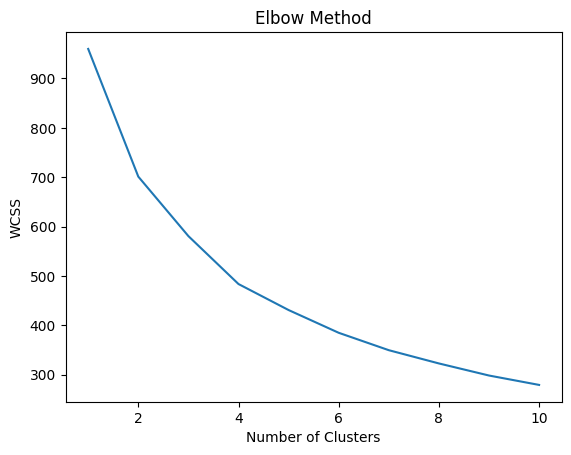

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_normalized)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [15]:
#elbow at 4 
# applying KNN classiefier split the data into test & train
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Create an instance of KNN classifier with 4 clusters
knn = KNeighborsClassifier(n_neighbors=4)

In [18]:
# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [19]:
y_pred = knn.predict(X_test)

In [20]:
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6793478260869565


In [21]:
#decision Tree implementation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score


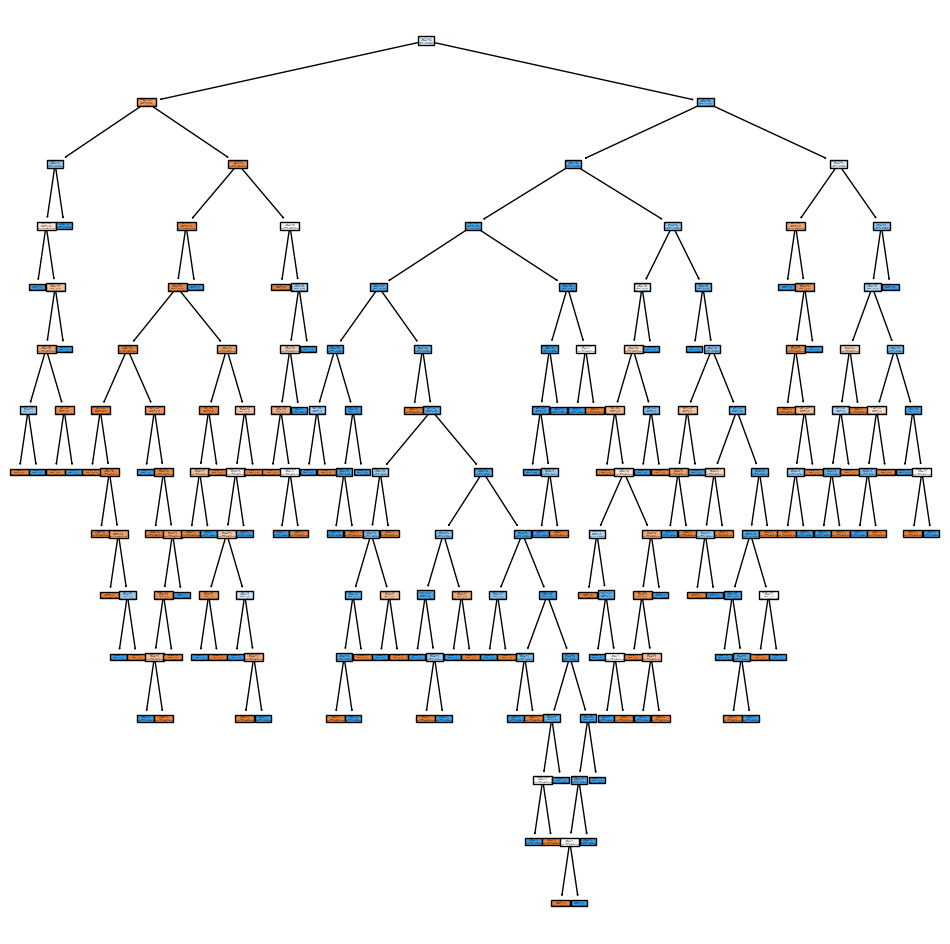

In [39]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# Train the decision tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

# Plot the decision tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(decision_tree, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'], filled=True, ax=ax)

# Show the plot
plt.show()

In [40]:
#post pruning
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5, 0.8333333333333334, 'x[10] <= 1.5\ngini = 0.496\nsamples = 734\nvalue = [333, 401]'),
 Text(0.25, 0.5, 'x[4] <= 42.5\ngini = 0.29\nsamples = 307\nvalue = [253, 54]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.43\nsamples = 32\nvalue = [10, 22]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.206\nsamples = 275\nvalue = [243, 32]'),
 Text(0.75, 0.5, 'x[1] <= 1.5\ngini = 0.305\nsamples = 427\nvalue = [80, 347]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.229\nsamples = 356\nvalue = [47, 309]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.498\nsamples = 71\nvalue = [33, 38]')]

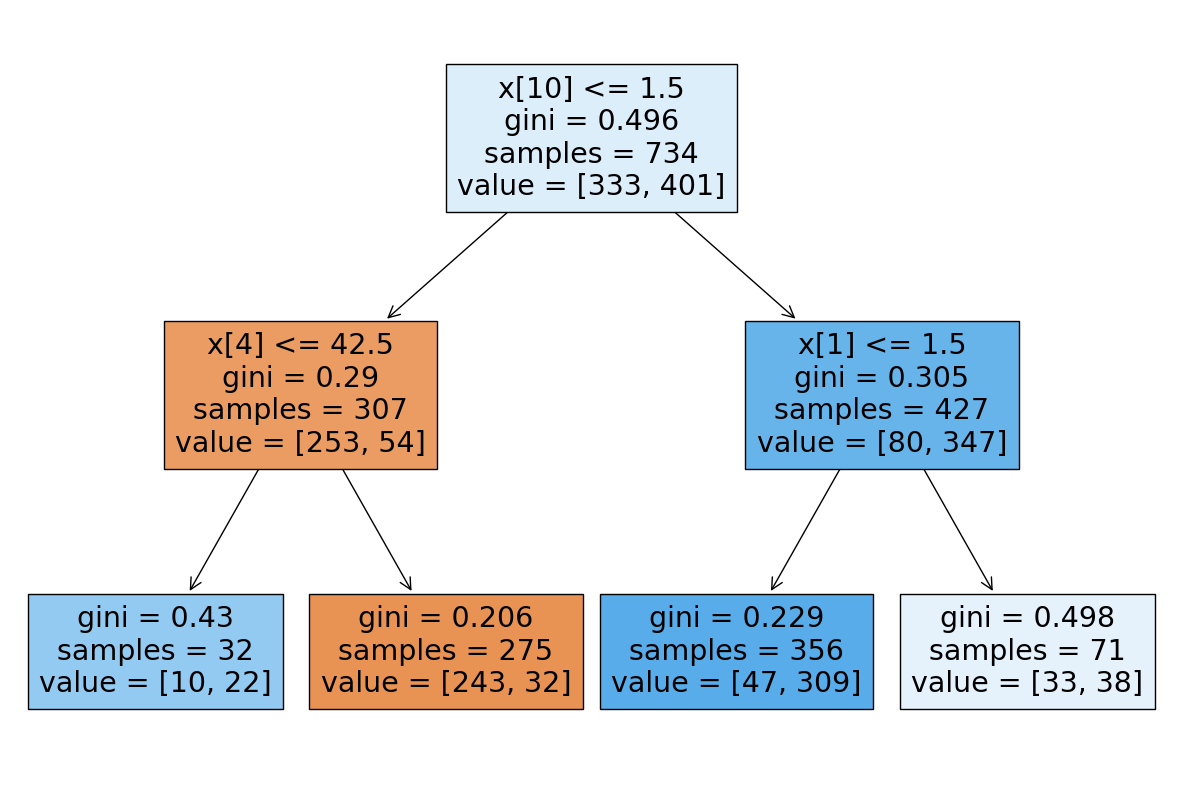

In [35]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree,filled=True)

[Text(0.5, 0.8333333333333334, 'x[10] <= 1.5\ngini = 0.496\nsamples = 734\nvalue = [333, 401]'),
 Text(0.25, 0.5, 'x[4] <= 42.5\ngini = 0.29\nsamples = 307\nvalue = [253, 54]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.43\nsamples = 32\nvalue = [10, 22]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.206\nsamples = 275\nvalue = [243, 32]'),
 Text(0.75, 0.5, 'x[1] <= 1.5\ngini = 0.305\nsamples = 427\nvalue = [80, 347]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.229\nsamples = 356\nvalue = [47, 309]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.498\nsamples = 71\nvalue = [33, 38]')]

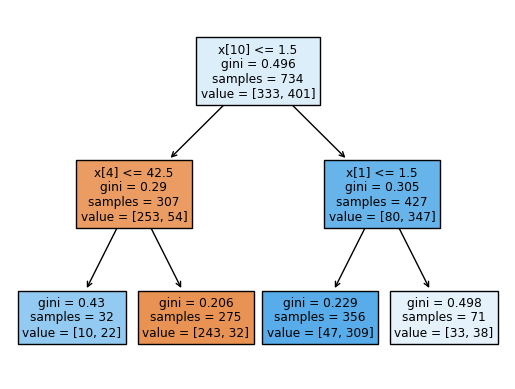

In [36]:
decision_tree  = DecisionTreeClassifier(max_depth = 2)
decision_tree.fit(X_train,y_train)
tree.plot_tree(decision_tree,filled=True)

In [37]:
print('The accuracy score is ',accuracy_score(y_test,Y_pred_logistic))


The accuracy score is  0.8315217391304348


In [22]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
logReg = LogisticRegression()


In [23]:
logReg.fit(X_train,y_train)


c:\users\saman\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
Y_pred_logistic = logReg.predict(X_test)

In [25]:
print('The accuracy score is ',accuracy_score(y_test,Y_pred_logistic))
precision = precision_score(y_test, Y_pred_logistic)
print("Precision:", precision)

The accuracy score is  0.8315217391304348
Precision: 0.8725490196078431


In [90]:
#RANDOM FORESTIMLEMENTATION

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [27]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8858695652173914


In [28]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.8981481481481481


In [82]:
#SVM IMPLEMENTATION

In [29]:
from sklearn.svm import SVC

In [30]:
svm = SVC()

In [31]:
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6847826086956522


In [33]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.7578947368421053
